In [6]:

import numpy as np
import matplotlib.pyplot as plt


import matplotlib.cm as cm
import time

import pandas as pd

In [7]:
train_log = pd.read_csv('train_log.csv')

In [8]:
train_log

,object_id,Z,Z_err,EBV,SpecType,English Translation,split,target
0,Dornhoth_fervain_onodrim,3.0490,NaN,0.110,AGN,Trawn Folk (Dwarfs) + northern + Ents (people),split_01,0
1,Dornhoth_galadh_ylf,0.4324,NaN,0.058,SN II,Trawn Folk (Dwarfs) + tree + drinking vessel,split_01,0
2,Elrim_melethril_thul,0.4673,NaN,0.577,AGN,Elves + lover (fem.) + breath,split_01,0
3,Ithil_tobas_rodwen,0.6946,NaN,0.012,AGN,moon + roof + noble maiden,split_01,0
4,Mirion_adar_Druadan,0.4161,NaN,0.058,AGN,"jewel, Silmaril + father + Wild Man",split_01,0
...,...,...,...,...,...,...,...,...
3038,tinnu_gellui_tathar,0.8898,NaN,0.042,AGN,"dusk, twilight + triumphant + tathar",split_20,0
3039,uir_heleg_corf,0.9598,NaN,0.042,AGN,eternity + ice + ring,split_20,0
3040,uir_rhosc_law,0.1543,NaN,0.024,SN II,"eternity + russet, red, brown + no! don't!",split_20,0
3041,uruk_in_pess,1.1520,NaN,0.019,AGN,evil creature + year + feather,split_20,0


In [9]:
test_log = pd.read_csv('test_log.csv')
test_log

,object_id,Z,Z_err,EBV,SpecType,English Translation,split
0,Eluwaith_Mithrim_nothrim,0.5393,0.03013,0.610,NaN,Sindar + Sindar + family,split_01
1,Eru_heledir_archam,0.7282,0.03508,0.058,NaN,God + kingfisher (bird) + throne,split_01
2,Gonhir_anann_fuin,0.6026,0.03185,0.070,NaN,"Master of Stone, Dwarf + long, for a long tim...",split_01
3,Gwathuirim_haradrim_tegilbor,0.5298,0.03013,0.014,NaN,Shadowy People (of Dunland) + People of the S...,split_01
4,achas_minai_maen,0.1654,0.02304,0.027,NaN,"achas + distinct, unique, single + clever, sk...",split_01
...,...,...,...,...,...,...,...
7130,ungol_ulug_saew,0.7611,0.03585,0.030,NaN,"spider + bad, evil + poison",split_20
7131,uruk_Ennor_tirith,0.4788,0.02987,0.058,NaN,"evil creature + Middle-Earth + guard, guarding",split_20
7132,ylf_faen_lost,0.2840,0.02611,0.017,NaN,"drinking vessel + radiant + empty, void",split_20
7133,yll_firiel_ruith,0.9608,0.03868,0.095,NaN,gulp + mortal maiden + anger,split_20


In [10]:

filter_colours = {'u': '#6A5ACD', 'g': '#2ca02c', 'r': '#d62728', 'i': '#ff7f0e', 'z': '#8c564b', 'y': '#1b1b1b'}

In [11]:
lc_spl = pd.read_csv("./split_01/train_full_lightcurves.csv")

In [12]:
from pathlib import Path

parent_dir = Path('./')

# Find all train.csv files in subdirectories
csv_files = list(parent_dir.glob('*/train_full_lightcurves.csv'))

# Alternative: if train.csv files are nested deeper, use recursive search
# csv_files = list(parent_dir.glob('**/train.csv'))

print(f"Found {len(csv_files)} train.csv files")

# Load and concatenate all CSV files
dfs = []
for csv_file in csv_files:
    print(f"Loading: {csv_file}")
    df = pd.read_csv(csv_file)
    # Optional: add a column to track which folder each row came from
    df['source_folder'] = csv_file.parent.name
    dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(dfs, ignore_index=True)

print(f"\nCombined DataFrame shape: {combined_df.shape}")
print(f"Columns: {combined_df.columns.tolist()}")
print(f"\nFirst few rows:")
print(combined_df.head())

# Optional: Save the combined dataframe
# combined_df.to_csv('combined_train.csv', index=False)

Found 20 train.csv files
Loading: split_01/train_full_lightcurves.csv
Loading: split_02/train_full_lightcurves.csv
Loading: split_03/train_full_lightcurves.csv
Loading: split_04/train_full_lightcurves.csv
Loading: split_05/train_full_lightcurves.csv
Loading: split_06/train_full_lightcurves.csv
Loading: split_07/train_full_lightcurves.csv
Loading: split_08/train_full_lightcurves.csv
Loading: split_09/train_full_lightcurves.csv
Loading: split_10/train_full_lightcurves.csv
Loading: split_11/train_full_lightcurves.csv
Loading: split_12/train_full_lightcurves.csv
Loading: split_13/train_full_lightcurves.csv
Loading: split_14/train_full_lightcurves.csv
Loading: split_15/train_full_lightcurves.csv
Loading: split_16/train_full_lightcurves.csv
Loading: split_17/train_full_lightcurves.csv
Loading: split_18/train_full_lightcurves.csv
Loading: split_19/train_full_lightcurves.csv
Loading: split_20/train_full_lightcurves.csv

Combined DataFrame shape: (479384, 6)
Columns: ['object_id', 'Time (MJD)',

In [13]:
combined_df.to_csv('combined_train_fulllightcurves.csv', index=False)

In [14]:

# Find all train.csv files in subdirectories
csv_files = list(parent_dir.glob('*/test_full_lightcurves.csv'))

# Alternative: if train.csv files are nested deeper, use recursive search
# csv_files = list(parent_dir.glob('**/train.csv'))

print(f"Found {len(csv_files)} test.csv files")

# Load and concatenate all CSV files
dfs = []
for csv_file in csv_files:
    print(f"Loading: {csv_file}")
    df = pd.read_csv(csv_file)
    # Optional: add a column to track which folder each row came from
    df['source_folder'] = csv_file.parent.name
    dfs.append(df)

# Combine all dataframes
combined_df_test = pd.concat(dfs, ignore_index=True)

print(f"\nCombined DataFrame shape: {combined_df_test.shape}")
print(f"Columns: {combined_df_test.columns.tolist()}")
print(f"\nFirst few rows:")
print(combined_df_test.head())
combined_df_test.to_csv('combined_test_fulllightcurves.csv', index=False)

Found 20 test.csv files
Loading: split_01/test_full_lightcurves.csv
Loading: split_02/test_full_lightcurves.csv
Loading: split_03/test_full_lightcurves.csv
Loading: split_04/test_full_lightcurves.csv
Loading: split_05/test_full_lightcurves.csv
Loading: split_06/test_full_lightcurves.csv
Loading: split_07/test_full_lightcurves.csv
Loading: split_08/test_full_lightcurves.csv
Loading: split_09/test_full_lightcurves.csv
Loading: split_10/test_full_lightcurves.csv
Loading: split_11/test_full_lightcurves.csv
Loading: split_12/test_full_lightcurves.csv
Loading: split_13/test_full_lightcurves.csv
Loading: split_14/test_full_lightcurves.csv
Loading: split_15/test_full_lightcurves.csv
Loading: split_16/test_full_lightcurves.csv
Loading: split_17/test_full_lightcurves.csv
Loading: split_18/test_full_lightcurves.csv
Loading: split_19/test_full_lightcurves.csv
Loading: split_20/test_full_lightcurves.csv

Combined DataFrame shape: (1145125, 6)
Columns: ['object_id', 'Time (MJD)', 'Flux', 'Flux_err',

In [15]:
import polars as pl

In [16]:
combined_df = combined_df.dropna().reset_index(drop=True) ## There were some nan values?

In [17]:
combined_df_test = combined_df_test.dropna().reset_index(drop=True)

In [18]:
uniq_lc_id_tr, obs_lc = np.unique(combined_df['object_id'], return_counts=True)
len(uniq_lc_id_tr)

3043

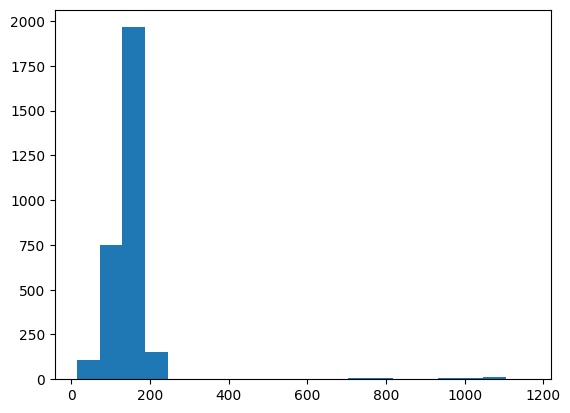

In [19]:
plt.hist(obs_lc, bins=20);

In [20]:
max(obs_lc)

1162

In [21]:
list_dict_dio = []
for i in range(len(uniq_lc_id_tr)):

    ## Create a dict
    # 'FLUXCAL', 'FLUXCALERR', 'MJD', 'BAND', 'ELASTICC_class'
    mask = combined_df['object_id']==uniq_lc_id_tr[i]
    #psfDiffFlux	psfDiffFluxErr expMidptMJD band
    dic = {'FLUXCAL':list(combined_df['Flux'][mask].values),
           'FLUXCALERR':list(combined_df['Flux_err'][mask].values), 
           'MJD':list(combined_df['Time (MJD)'][mask].values),
           'BAND':list(combined_df['Filter'][mask].values),
            'spectro_class': train_log[train_log['object_id']==uniq_lc_id_tr[i]]['SpecType'].values[0],
           'binary_class':  train_log[train_log['object_id']==uniq_lc_id_tr[i]]['target'].values[0],
          'ObjectId':uniq_lc_id_tr[i]}
    list_dict_dio.append(dic)

parq_dp1 = pl.DataFrame(list_dict_dio)

# Now we have a polar dataframe that is similar to what we were doing in elasticc2_parq

In [91]:
## Saving the polar Dataframe as a parquet file

# compression{‘lz4’, ‘uncompressed’, ‘snappy’, ‘gzip’, ‘lzo’, ‘brotli’, ‘zstd’}

#     Choose “zstd” for good compression performance. Choose “lz4” for fast compression/decompression. 
#     Choose “snappy” for more backwards compatibility guarantees when you deal with older parquet readers.

parq_dp1.write_parquet("/scratch/gcontard/MALLORN/train_mallorn_data.parq", compression="lz4")


In [52]:
parq_dp1

FLUXCAL,FLUXCALERR,MJD,BAND,spectro_class,binary_class,ObjectId
list[f64],list[f64],list[f64],list[str],str,i64,str
"[-1.970311, 0.833014, … 0.412255]","[0.807963, 0.368413, … 0.125994]","[61460.8727, 63968.1111, … 62948.3276]","[""y"", ""i"", … ""r""]","""AGN""",0,"""Dornhoth_anwar_melethron"""
"[0.274922, 0.191174, … 0.405841]","[2.195014, 0.139372, … 0.101548]","[62913.1184, 63958.2391, … 63528.3593]","[""z"", ""g"", … ""g""]","""AGN""",0,"""Dornhoth_archam_grond"""
"[0.189548, -0.022459, … 1.374008]","[0.202875, 0.2248284, … 0.58815]","[62354.8439, 63855.7029, … 63111.5374]","[""r"", ""g"", … ""z""]","""SN Ia""",0,"""Dornhoth_certh_iaun"""
"[1.051772, 0.290583, … 2.107653]","[0.8639606, 0.1897211, … 0.200777]","[64025.3964, 63712.8062, … 63329.707]","[""y"", ""r"", … ""r""]","""SN Ia""",0,"""Dornhoth_drafn_celon"""
"[-1.630159, 10.499389, … 0.802379]","[0.365777, 0.253867, … 0.186741]","[63314.4662, 63780.9674, … 63640.1368]","[""z"", ""r"", … ""i""]","""AGN""",0,"""Dornhoth_fervain_onodrim"""
…,…,…,…,…,…,…
"[-0.196774, 0.079269, … 0.471519]","[0.493123, 0.145988, … 0.416845]","[63990.7231, 64005.6823, … 64449.4725]","[""z"", ""r"", … ""z""]","""SN Ia""",0,"""yll_lebenedh_cair"""
"[2.115769, 2.552514, … -0.58304]","[0.334359, 0.450688, … 1.334266]","[63774.3224, 63774.3224, … 64529.8902]","[""r"", ""i"", … ""y""]","""TDE""",1,"""yll_merilin_rach"""
"[1.258772, 1.62227, … 0.156546]","[0.195577, 0.400587, … 0.13018]","[63971.4577, 63971.4577, … 64624.1071]","[""i"", ""z"", … ""r""]","""SN Ia""",0,"""yll_minai_gondrath"""


Text(0.5, 1.0, '1685')

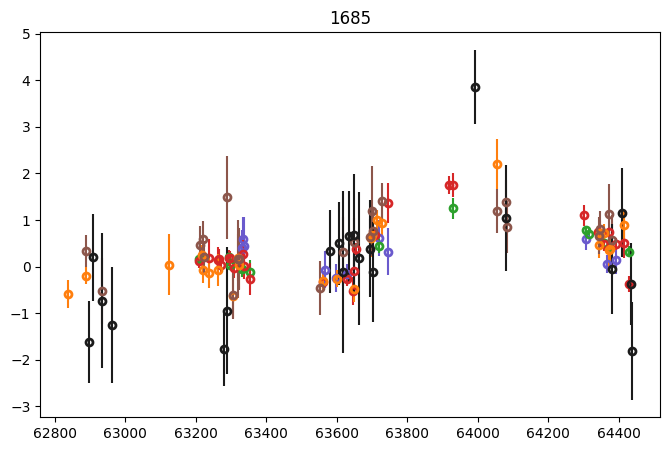

In [89]:
## Plotting:

id_ = np.random.randint(len(parq_dp1))

plt.figure(figsize=(8,5))
for b_ in ['u','g','r','i','z','y']:
    m_ = parq_dp1[id_]['BAND'].item()==b_
    plt.errorbar(parq_dp1[id_]['MJD'].item().filter(m_), 
                 parq_dp1[id_]['FLUXCAL'].item().filter(m_),
                 yerr=parq_dp1[id_]['FLUXCALERR'].item().filter(m_),
                 ms=5,
                mew=2, marker='o', color='none', ecolor= filter_colours[b_],
                mec = filter_colours[b_], label=b_)
plt.title(id_)

## In reality we want to have a training set and a test set from the training set for the supervised step
## And we probably want to merge training+test for the pre-training step, and then split it again into a training and test step (possibly validation?)

(I probably could have just split randomly the polar DataFrame)

In [24]:
import random
np.random.seed(42)
random.seed(42)

arange_ = np.arange(len(uniq_lc_id_tr))
np.random.shuffle(arange_)
arange_


array([ 298, 2792,  139, ..., 1130, 1294,  860])

In [26]:
nb_train = int(len(arange_)*.80)
print(nb_train)

2434


In [28]:
list_dict_dio = []
for i in arange_[:nb_train]:

    ## Create a dict
    # 'FLUXCAL', 'FLUXCALERR', 'MJD', 'BAND', 'ELASTICC_class'
    mask = combined_df['object_id']==uniq_lc_id_tr[i]
    #psfDiffFlux	psfDiffFluxErr expMidptMJD band
    dic = {'FLUXCAL':list(combined_df['Flux'][mask].values),
           'FLUXCALERR':list(combined_df['Flux_err'][mask].values), 
           'MJD':list(combined_df['Time (MJD)'][mask].values),
           'BAND':list(combined_df['Filter'][mask].values),
            'spectro_class': train_log[train_log['object_id']==uniq_lc_id_tr[i]]['SpecType'].values[0],
           'binary_class':  train_log[train_log['object_id']==uniq_lc_id_tr[i]]['target'].values[0],
          'ObjectId':uniq_lc_id_tr[i]}
    list_dict_dio.append(dic)

parq_train_supervised = pl.DataFrame(list_dict_dio)

list_dict_dio = []
for i in arange_[nb_train:]:

    ## Create a dict
    # 'FLUXCAL', 'FLUXCALERR', 'MJD', 'BAND', 'ELASTICC_class'
    mask = combined_df['object_id']==uniq_lc_id_tr[i]
    #psfDiffFlux	psfDiffFluxErr expMidptMJD band
    dic = {'FLUXCAL':list(combined_df['Flux'][mask].values),
           'FLUXCALERR':list(combined_df['Flux_err'][mask].values), 
           'MJD':list(combined_df['Time (MJD)'][mask].values),
           'BAND':list(combined_df['Filter'][mask].values),
            'spectro_class': train_log[train_log['object_id']==uniq_lc_id_tr[i]]['SpecType'].values[0],
           'binary_class':  train_log[train_log['object_id']==uniq_lc_id_tr[i]]['target'].values[0],
          'ObjectId':uniq_lc_id_tr[i]}
    list_dict_dio.append(dic)

parq_test_supervised = pl.DataFrame(list_dict_dio)


In [29]:

parq_train_supervised.write_parquet("/scratch/gcontard/MALLORN/train_mallorn_supervised.parq", compression="lz4")

parq_test_supervised.write_parquet("/scratch/gcontard/MALLORN/test_mallorn_supervised.parq", compression="lz4")


In [30]:
## TODO: Merge the train and "true test" set and create a new train/test set for the pre-training step